# Perceptron and SVM
---

In [183]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150

In [184]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

In [185]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 2. Select first 2 features and first 2 categories

In [186]:
# Iris flowers with target '2' removed from dataset
df = df[df['target'] != 2]
df.shape

(100, 5)

In [187]:
# Selected only first '2' features and target y
y = pd.Series(df['target']).values
df = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

### 3. Randomly split data into train, validation and test sets in proportion 5:2:3

In [188]:
X = df.values
y = y

In [189]:
X.shape, y.shape

((100, 2), (100,))

In [190]:
from sklearn.model_selection import train_test_split

# X, y -> X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# X_train, y_train -> X_train, X_val, y_train, y_val
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=2/7, random_state=1)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((50, 2), (20, 2), (30, 2), (50,), (20,), (30,))

## Perceptron

In [191]:
class Perceptron:

    def __init__(self, learning_rate=0.1, n_iter=None):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []

    # f: x -> x * w + b
    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b
    
    # if f(x)>=0 -> out = 1, else f(x)<0 -> out = -1
    def predict(self, x: np.array) -> int:
        return np.where(self.f(x) >= 0.0, 1, -1)
    
    def fit(self, x: np.array, y: np.array):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi-self.predict(xi))
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)

#### Perceptron training and evaluation

In [192]:
lr_list = [0.01, 0.1, 0.5]

In [193]:
from sklearn.metrics import accuracy_score

best_acc = 0
best_lr = 0

for lr in lr_list:

    P = Perceptron(learning_rate=lr, n_iter=100)

    # fit
    P.fit(X_train, y_train)

    # eval
    acc_score = accuracy_score(y_val, P.predict(X_val))

    if (acc_score > best_acc):
        best_acc = acc_score
        best_lr = lr

#### Best results

In [194]:
print(f'Best results: \n')
print(f'    Learning rate = {best_lr}')
print(f'    Accuracy = {best_acc}')
print()
print('Parameters learnt:\n')
print(f'    w = {P._w}')
print(f'    w = {P._b}')

Best results: 

    Learning rate = 0.01
    Accuracy = 0.55

Parameters learnt:

    w = [ 14.1 -12. ]
    w = -15.0


In [195]:
acc_score = accuracy_score(y_test, P.predict(X_test))
acc_score

0.5333333333333333

#### Plot

/var/folders/qj/_vcxrhks50v5f7x15kwlmmg40000gn/T/ipykernel_71104/2210500533.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  cs = plt.contourf(X1, X2, Y,


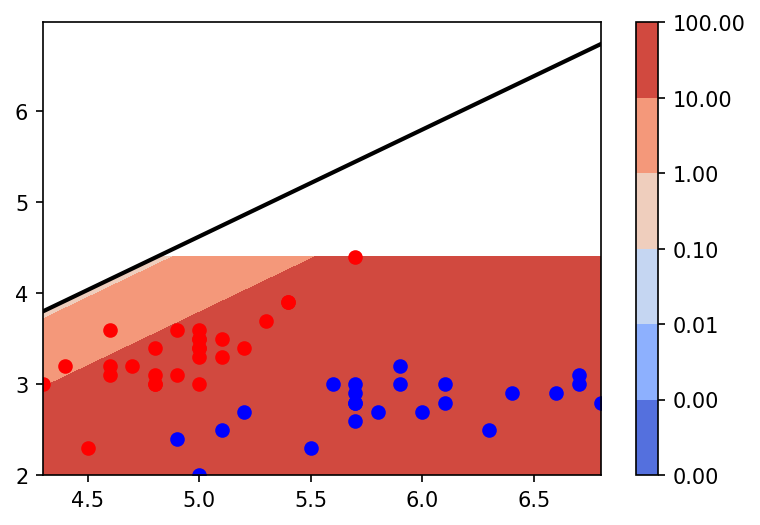

In [202]:
from matplotlib import ticker, cm
from numpy import ma

# Contour
N = 1000
x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), N)
x2 = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), N)
X1, X2 = np.meshgrid(x1, x2)

Y = X1 * P._w[0] + X2 * P._w[1] + P._b

cs = plt.contourf(X1, X2, Y,
                  locator=ticker.LogLocator(),
                  cmap="coolwarm")

cbar = plt.colorbar(cs)

# Compute the boundary for a set of constant values of x1
x1_line = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
x2_line = -(x1_line * P._w[0] + P._b) / P._w[1]
plt.plot(x1_line, x2_line, color='black', linewidth=2)

plt.scatter(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], c='r')
plt.scatter(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], c='b')

plt.show()

In [203]:
Y[:,0].min(), Y[:,0].max(), Y[:,1].min(), Y[:,1].max(), 

(-7.170000000000414, 21.629999999999754, -7.13471471471513, 21.665285285285037)

In [204]:
X1.shape

(1000, 1000)